Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [1]:
NAME = "Juliana Yakimchuk"
COLLABORATORS = ""

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import reciprocal, uniform

In [3]:
raw_data = pd.read_csv('train.csv')
raw_data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#check if column names have weird symbols - all good
print(raw_data.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [5]:
#reset index for better readability
raw_data =   raw_data.set_index(['PassengerId'])
raw_data.sort_index()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
raw_data.nunique() 

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [7]:
raw_data.info()
#Based on the output, data types are correctly interpreted, though some categorical variables are considered 
#numerical(e.g. 'Survived' and 'Pclass'). We also have a lot of null values in "Age" and "Cabin". 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
raw_data['Survived'].value_counts(normalize = True)
#from what we can see around 60% of Titanic passengers did not survive.

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [9]:
raw_data.groupby('Survived').mean()
#Based on the means, passengers of higher classes (and fares) had better survival rate. 
#Having relatives on board (and their #) only slightly affected survival rate

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


<AxesSubplot:xlabel='Pclass', ylabel='count'>

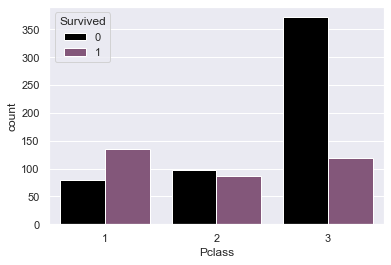

In [10]:
cmap = sns.cubehelix_palette( start=.5, rot=0, dark=4, light=-0.5)
sns.countplot(x = raw_data['Pclass'], hue = raw_data['Survived'], palette = cmap)

#we can see that the lower the class, the slimmer are survival chances. 
#This feature will definitely be important for our analysis

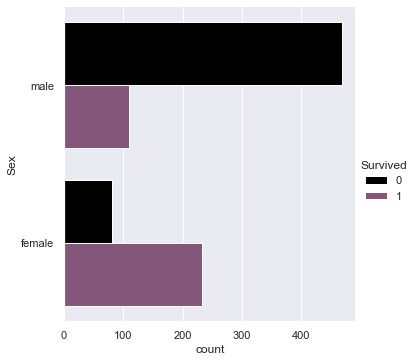

In [11]:

sns.catplot(y='Sex', hue ="Survived", kind = 'count', data = raw_data, palette=cmap)
#As we can see, a much bigger percentage of women survived compared to men.

In [12]:
raw_data.dropna(subset = ['Embarked'],inplace = True)

In [13]:
'''
We should decide which columns we'd like to keep for our analysis.
1. The "Name" column doesn't convey any additional information. In most cases, any relations will be duplicated 
in "SibSp" or "Parch" colummns. They would be a better measure of relationship, as people may share the same 
last name without being related, or adult siblings might have different last names.
2. The "Fare" column values will undoubtedy depend on "Pclass". Again, no need to keep duplicated information, 
and introduce multicollinearity.
3. The "Ticket" column will most likely correlate to "Parch" and "SibSp" columns. 
Let's run a few checks to confirm if it's OK to remove this column.
'''
raw_data['Ticket'].nunique()

680

In [14]:
tick_dup = raw_data[raw_data.duplicated(['Ticket'])]
dup_count = tick_dup[(tick_dup['SibSp'] ==0) & (tick_dup['Parch']==0)].agg('count')
dup_count['TotalPassengers'] = raw_data['Ticket'].count()
dup_count['PerTotal'] = dup_count['Ticket']*100/dup_count['TotalPassengers']
dup_count

#As we can see, the # of duplicate tickets that do not belong to family members is only about 5%,
#we can remove this column

Survived            43.000000
Pclass              43.000000
Name                43.000000
Sex                 43.000000
Age                 33.000000
SibSp               43.000000
Parch               43.000000
Ticket              43.000000
Fare                43.000000
Cabin               14.000000
Embarked            43.000000
TotalPassengers    889.000000
PerTotal             4.836895
dtype: float64

In [15]:
raw_data.drop(['Fare','Ticket','Cabin','Name'],axis = 1,inplace=True)
raw_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,S
2,1,1,female,38.0,1,0,C
3,1,3,female,26.0,0,0,S
4,1,1,female,35.0,1,0,S
5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,S
888,1,1,female,19.0,0,0,S
889,0,3,female,NaN,1,2,S


<AxesSubplot:ylabel='Frequency'>

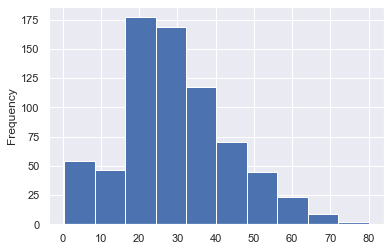

In [16]:
#Before we drop any more columns, let's first fill the missing values in the age column. 
#We will do group imputation. In order to decide if we'll use mean or median, we should plot the data
#plt.cm.get_cmap(name='Accent', lut=None)
plt.style.use('seaborn-deep')
#plt.cm.register_cmap(cmap=s)
raw_data['Age'].plot(kind = 'hist')

#Based on the histogram, we can see that the data is skewed to the right, it is best to use "median" to fill N/A

In [17]:
'''we decided to use the following groups for imputation:
1. 'Sex' - at the beginning of the 20th century, it would have been unlikely for a woman to travel alone. 
She would likely travel with an acoompanying male,it will be safe to assume that in many cases it would be a 
father or a spouse. In both cases the male would likely be older (for spouses this is historically the case, 
and obviously for fathers this is biologically the case).
2. 'Pclass' - passengers in higher classes tend to be older due to accumulation of wealth over their lifetime.
3. 'Survived' - supposedly children evacuated first (we are about to find out).
'''
raw_data.groupby(['Sex','Pclass','Survived']).agg("median")

#Per the below summary, the selected categories indeed reflect a difference in mean, so we believe 
#it is the right choice

Age  SibSp  Parch
Sex    Pclass Survived                    
female 1      0         25.0    1.0    2.0
              1         35.0    0.0    0.0
       2      0         32.5    0.5    0.0
              1         28.0    0.0    0.0
       3      0         22.0    1.0    1.0
              1         19.0    0.0    0.0
male   1      0         45.5    0.0    0.0
              1         36.0    0.0    0.0
       2      0         30.5    0.0    0.0
              1          3.0    0.0    1.0
       3      0         25.0    0.0    0.0
              1         25.0    0.0    0.0

In [18]:
raw_data['Age'].fillna(raw_data.groupby(['Sex','Pclass','Survived'])['Age'].transform('median'),inplace = True)
raw_data.isnull().sum()*100/raw_data.isnull().count()

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Embarked    0.0
dtype: float64

In [19]:
'''
We should create bins for age to make it easier to visualize. We will use life expectancy data from 
https://www.statista.com/statistics/1040159/life-expectancy-united-kingdom-all-time/ to determine our upper bin 
threshold. Based on this info, average life expectancy in 1910 was 52 years,so we can consider 56+ a 
reasonable upper bin. 16 was chosen as a somewhat arbitrary upper threshold of when the child no longer looks 
like a child. The evacuation process must have been somewhat chaotic and it's possible that decisions were made 
based on visible features.
'''
bins = [0,16,26,36,46,56,90]
bin_labels = ['child <16','teenager/young adult 16-25', 'young adult 26-35', 'adult 36-45', 'adult 46-55', 'senior citizen 56+']
raw_data["Age_groups"] = pd.cut(raw_data["Age"], bins, right=False, labels = bin_labels)
raw_data.tail(30)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_groups
PassengerId,,,,,,,,
862,0,2,male,21.0,1,0,S,teenager/young adult 16-25
863,1,1,female,48.0,0,0,S,adult 46-55
864,0,3,female,22.0,8,2,S,teenager/young adult 16-25
865,0,2,male,24.0,0,0,S,teenager/young adult 16-25
866,1,2,female,42.0,0,0,S,adult 36-45
867,1,2,female,27.0,1,0,C,young adult 26-35
868,0,1,male,31.0,0,0,S,young adult 26-35
869,0,3,male,25.0,0,0,S,teenager/young adult 16-25
870,1,3,male,4.0,1,1,S,child <16


In [20]:
#We should decide if we want to keep 'Age' column. 
#For this we will plot data to see if there is a difference in survival rates among different age groups.
#We'll cast data to integer, we do not need the precision of float in this case.

raw_data['Age'] = raw_data['Age'].astype(int)
raw_data.info()

age_plot = pd.crosstab(raw_data['Age_groups'], raw_data['Survived'], normalize = 'columns')
age_plot

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    889 non-null    int64   
 1   Pclass      889 non-null    int64   
 2   Sex         889 non-null    object  
 3   Age         889 non-null    int64   
 4   SibSp       889 non-null    int64   
 5   Parch       889 non-null    int64   
 6   Embarked    889 non-null    object  
 7   Age_groups  889 non-null    category
dtypes: category(1), int64(5), object(2)
memory usage: 56.6+ KB


Survived,0,1
Age_groups,,
child <16,0.061931,0.150000
teenager/young adult 16-25,0.446266,0.320588
young adult 26-35,0.218579,0.276471
adult 36-45,0.158470,0.144118
adult 46-55,0.065574,0.076471
senior citizen 56+,0.049180,0.032353


<AxesSubplot:xlabel='Age_groups'>

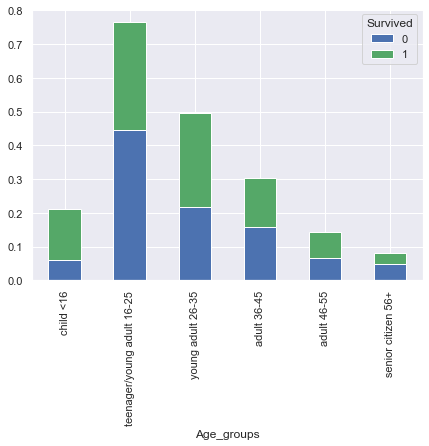

In [21]:
#We'll visualize data for better readability
plt.style.use('seaborn-deep')
age_plot.plot(kind='bar', figsize=(7,5),stacked = True)

#as we can see, most categories are somewhat balanced in terms of survival rates, except for "child" and
# "young adult" age ranges. Children were most likely prioritized for evacuation, whereas the situation 
#with teenagers/young adults is not that clear. Senior citizens were also less likely to survive, but their 
#proportion was overall small.

<AxesSubplot:xlabel='Age_groups', ylabel='count'>

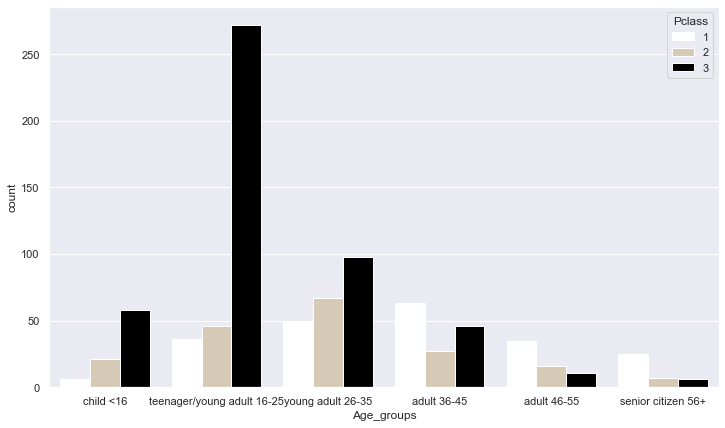

In [22]:
#My hypothesis is that the age group 16-25 is overrepresented in lower classes, 
#thus  their survival rate is affected by this factor. To test it, let's plot age groups by class:
palette = sns.cubehelix_palette( start=.8, rot=0.2, dark=-6, light=2.5)
sns.set(rc={'figure.figsize':(12,7)})
sns.countplot(x = 'Age_groups' , hue = 'Pclass', data = raw_data, palette = palette)

#And indeed, we see a large number of teenagers/young adults to be in third class, which we remember had 
#a particularly low survival rate. In this case, we think that "Pclass" is the main category, 
#and we should be safe to remove this age group from our analysis.

In [23]:
#what we will do is, instead of keeping the age category, we will create a new category "Child",
#as it's a better predictor of survival than the age category. Values would be: Y = child, N = not child

raw_data['Child'] = raw_data['Age'].map(lambda x: 'Y' if x<16 else 'N')
raw_data.sort_values('Age')

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_groups,Child
PassengerId,,,,,,,,,
804,1,3,male,0,0,1,C,child <16,Y
306,1,1,male,0,1,2,S,child <16,Y
832,1,2,male,0,1,1,S,child <16,Y
756,1,2,male,0,1,1,S,child <16,Y
79,1,2,male,0,0,2,S,child <16,Y
...,...,...,...,...,...,...,...,...,...
746,0,1,male,70,1,1,S,senior citizen 56+,N
494,0,1,male,71,0,0,C,senior citizen 56+,N
97,0,1,male,71,0,0,C,senior citizen 56+,N


In [24]:
#we will check our numeric categories' p-values (as their correlation with the dependent variable) to decide if 
#we should keep them.
x_with_num = raw_data[['SibSp','Parch']]
y = raw_data.iloc[:,0]
sel_num = SelectKBest(k='all')
sel_num.fit(x_with_num, y)
x_train_fs = sel_num.transform(x_with_num)

features = x_with_num.columns
pvalues = dict(zip(features, sel_num.pvalues_))
scores = dict(zip(features,sel_num.scores_))  

print(pvalues)
print(scores)

#based on the output, 'SibSp' p-value is too high and score is low, we will remove it. 
#'Parch' p-value is on the higher side, but within the 0.05 cutoff. We'll keep it for now and remove it at a later 
#time if required.

{'SibSp': 0.31067537341133067, 'Parch': 0.013136766201093403}
{'SibSp': 1.0289782858207495, 'Parch': 6.1754623279069}


In [25]:
'''
We'll check categorical data to see if there is a correlation with our target. As we are comparing categorical 
features with categorical output, it is appropriate to use chi-squared test.
First, we'll convert our categorical data to dummy variables.
'''
x_with_categ = pd.get_dummies(raw_data.drop(['Survived','Age','Age_groups','SibSp','Parch'],axis = 1))
x_with_categ
y = raw_data.iloc[:,0]

sel_categ = SelectKBest(score_func=chi2, k='all')
sel_categ.fit(x_with_categ,y)
x_train_fs = sel_categ.transform(x_with_categ)

features = x_with_categ.columns
pvalues = dict(zip(features, sel_categ.pvalues_))
scores = dict(zip(features,sel_categ.scores_))   

print(pvalues)
print(scores)

{'Pclass': 4.029368274214839e-08, 'Sex_female': 1.0830703467683812e-38, 'Sex_male': 1.1080339840333552e-21, 'Embarked_C': 5.02283980175645e-06, 'Embarked_Q': 0.8971611206152695, 'Embarked_S': 0.0175163338584307, 'Child_N': 0.17962683117470934, 'Child_Y': 3.674378508332027e-05}
{'Pclass': 30.13526610569773, 'Sex_female': 169.2423053742304, 'Sex_male': 91.51403687480048, 'Embarked_C': 20.828557939569272, 'Embarked_Q': 0.016705142066762147, 'Embarked_S': 5.643886757601594, 'Child_N': 1.8007087739807341, 'Child_Y': 17.03258652094717}


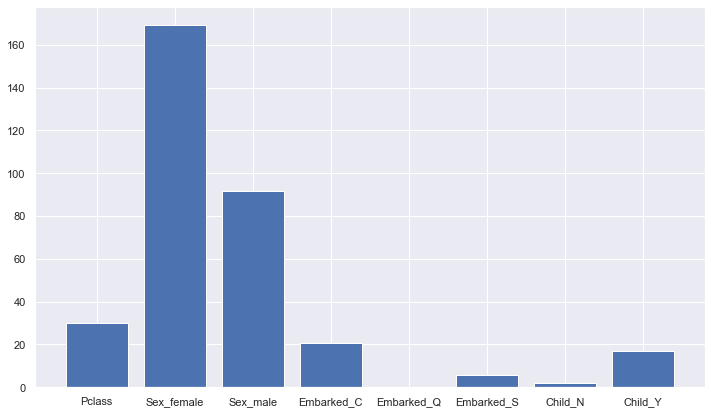

In [26]:
#Looking at the p-values of different categories, we can see that 'Embarked_Q' has a p-value of >0.05. 'Embarked_S',
#though wihin the 0.05 cutoff, still has a comparatively high p-value. 'Child-N' has  a low p-value too, but we'll 
#keep it for reference, as the counterpart seems to be quite significant.

plt.bar([i for i in scores.keys()],[i for i in scores.values()])
plt.show()

#We also plotted scores for all variables. Based on the graphs, the category "Embarked" overall, has no significant
#score compared to other features, even though "Embarked-C" had a good p-value. We'll investigate this category 
#further to decide whether we want to remove it. 

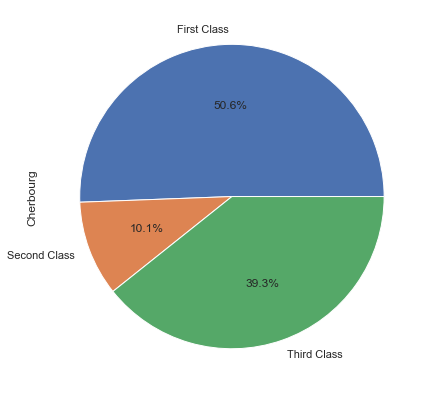

In [27]:
port = raw_data[raw_data['Embarked'] == 'C']
labels = ['First Class', 'Second Class', 'Third Class']
pie = port.groupby('Pclass')['Embarked'].count()
pie.plot.pie(autopct="%.1f%%",  labels = labels)
plt.ylabel('Cherbourg')
plt.show()
#Based on this, a disproportionate # of passengers, who embarked at Cherbourg, had first-class tickets, 
#and as we established, first class had much higher survival rates.
#"Embarked_C" strongly correlates with "PClass" and it's best to remove this feature.

In [28]:
raw_data.drop(['SibSp','Embarked','Age_groups','Age'],axis = 1,inplace=True)

raw_data

,Survived,Pclass,Sex,Parch,Child
PassengerId,,,,,
1,0,3,male,0,N
2,1,1,female,0,N
3,1,3,female,0,N
4,1,1,female,0,N
5,0,3,male,0,N
...,...,...,...,...,...
887,0,2,male,0,N
888,1,1,female,0,N
889,0,3,female,2,N


In [29]:
'''
We will check remaining features for multicollinearity using VIF method.For this we'll create a new slice of  
the dataframe, "drop_first" parameter is necessary, otherwise VIF will be estimated as infinity. 
We'll also use this data later, and having one less dummy variable for each category will help to avoid the 
so-called "dummy variable trap".
'''

data_preprocessed = pd.get_dummies(data = raw_data,columns = ['Pclass','Parch','Child','Sex'],drop_first = True)

data_preprocessed

,Survived,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Child_Y,Sex_male
PassengerId,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,1,0,0,0,0,0,0,0,0,1
888,1,0,0,0,0,0,0,0,0,0,0
889,0,0,1,0,1,0,0,0,0,0,0


In [30]:
vif = pd.DataFrame()
vif_values = data_preprocessed.drop(['Survived'],axis = 1)
vif['VIF'] = [variance_inflation_factor(vif_values.values,i) for i in range(vif_values.shape[1])]
vif['features'] = vif_values.columns
vif
#as we can see, all VIF values are within the preferred <5 range, no multicollinearity is evidently present.

,VIF,features
0,1.345746,Pclass_2
1,1.044789,Pclass_3
2,1.304222,Parch_1
3,1.279953,Parch_2
4,1.014371,Parch_3
5,1.005401,Parch_4
6,1.017388,Parch_5
7,1.004446,Parch_6
8,1.492497,Child_Y
9,0.247063,Sex_male


In [31]:
#We ended up with a bunch of categorical variables trying to predict another categorical variable
#One of the possible options here is to use Logistic Regression

In [32]:
y = data_preprocessed['Survived']
x1 = data_preprocessed.drop(['Survived'], axis = 1)
x  = sm.add_constant(x1)

In [33]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit(method='lbfgs', maxiter = 250, random_state = 42)
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      878
Method:                           MLE   Df Model:                           10
Date:                Wed, 10 Nov 2021   Pseudo R-squ.:                  0.3292
Time:                        10:30:55   Log-Likelihood:                -396.74
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.749e-77
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4001      0.240     10.013      0.000       1.930       2.870
Pclass_2      -0.9943      0.251     -3.967      0.000      -1.486      -0.503
Pclass_3      -2.0560      0.223     -9.206      0.000      -2.494      -1.618
Parch_1       -0.0088      0.277     -0.032      0.975      -0.551       0.533
Parch_2       -0.6971      0.330     -2.111      0.035      -1.345      -0.050
Parch_3        0.1676      1.101      0.152      0.879      -1.990       2.325
Parch_4      -12.4333    262.984     -0.047      0.962    -527.872     503.005
Parch_5       -1.4725      1.161     -1.268      0.205      -3.748       0.803
Parch_6       -8.4024     56.232     -0.149      0.881    -118.616     101.811
Child_Y        1.4859      0.340      4.374      0.000       0.820       2.152
Sex_male      -2.7332      0.197    -13.887      0.000      -3.119      -2.347
==============================================================================
"""

In [34]:
#As we can see, "Parch" category shows a high p-value for most categories, except Parch_2 (and even that is on 
#the higher side). We should remove "Parch" categories and try the regression again

In [35]:
no_parch = pd.get_dummies(data = raw_data.drop(['Parch'], axis = 1),columns = ['Pclass','Child','Sex'],\
                          drop_first = True)

no_parch

,Survived,Pclass_2,Pclass_3,Child_Y,Sex_male
PassengerId,,,,,
1,0,0,1,0,1
2,1,0,0,0,0
3,1,0,1,0,0
4,1,0,0,0,0
5,0,0,1,0,1
...,...,...,...,...,...
887,0,1,0,0,1
888,1,0,0,0,0
889,0,0,1,0,0


In [36]:
y_no_parch = no_parch['Survived']
x1_no_parch = no_parch.drop(['Survived'], axis = 1)
x_no_parch  = sm.add_constant(x1_no_parch)


In [37]:
#We decided which attributes we will include in our final analysis, i.e. 'Pclass', 'Sex', 'Child',and our dependent 
# variable 'Survived'. We will now split data on train/test datasets and see if our model has any predictive power.


x = x_no_parch
y = y_no_parch

skfolds = StratifiedKFold(n_splits = 3)

for train_index, test_index in skfolds.split(x,y):
    x_train_unscaled, x_test_unscaled = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
scaler = StandardScaler()
scaler = scaler.fit(x_train_unscaled)
x_train = scaler.transform(x_train_unscaled)
x_test = scaler.transform(x_test_unscaled)
model2=sm.Logit(y_train,x_train)
result2=model2.fit(class_weight = 'balanced',method='lbfgs', maxiter = 250, random_state = 42,shuffle = True )

print(result2.summary())

#

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  593
Model:                          Logit   Df Residuals:                      589
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Nov 2021   Pseudo R-squ.:                  0.2599
Time:                        10:30:56   Log-Likelihood:                -292.04
converged:                       True   LL-Null:                       -394.59
Covariance Type:            nonrobust   LLR p-value:                 3.328e-44
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0        nan        nan        nan         nan         nan
x1            -0.2004        nan        nan        nan         nan         nan
x2            -0.7558        nan        nan        n

/Users/test/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [38]:
#Now all our p_values look good, including LLR p-value. Log-likelihood is lower than LL-Null. 
#Our model has significance We will now try to predict outcomes on our test set.

y_pred=(result2.predict(x_test)>0.5).astype(int)

print(classification_report(y_pred,y_test, digits = 3))

#From the result we can see that the model is slightly biased, and predicts the major class ("died") 
#better than the smaller class "survived". But overall accuracy is slightly above 80%, which is 
#an acceptable result given our limited sample size.

              precision    recall  f1-score   support

           0      0.863     0.802     0.832       197
           1      0.655     0.747     0.698        99

    accuracy                          0.784       296
   macro avg      0.759     0.775     0.765       296
weighted avg      0.794     0.784     0.787       296



In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
X = x_no_parch
y = y_no_parch
X_train_unscaled,X_test_unscaled, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify = y)
scaler = StandardScaler()
scaler = scaler.fit(x_train_unscaled)
X_train = scaler.transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train,y_train)
scores = cross_val_score(knn, X_train, y_train, cv=3, n_jobs=-1, scoring = 'f1_weighted')
scores.mean()

0.7800234567195825

In [155]:
y_pred = knn.predict(X_test)
print(classification_report(y_pred,y_test, digits = 3))

              precision    recall  f1-score   support

           0      0.958     0.778     0.859       203
           1      0.559     0.891     0.687        64

    accuracy                          0.805       267
   macro avg      0.758     0.834     0.773       267
weighted avg      0.862     0.805     0.817       267



In [134]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier

ada_boost = AdaBoostClassifier(random_state = 42)

n_estimators = [50, 100, 400, 700, 1000]
learning_rate = [0.001, 0.01, 0.05, 0.09]
algorithm = ['SAMME', 'SAMME.R']

param_grid_ada = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate, 'algorithm' : algorithm}

rand_search_ada = RandomizedSearchCV(ada_boost, param_grid_ada, cv = 4, scoring='f1_weighted', refit = True, n_jobs = -1, verbose = 2)

rand_search_ada.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.09],
                                        'n_estimators': [50, 100, 400, 700,
                                                         1000]},
                   scoring='f1_weighted', verbose=2)

In [114]:
ada_estimator = rand_search_ada.best_estimator_

y_pred_ada_estimator = ada_estimator.predict(X_train)
accuracy_score(y_train, y_pred_ada_estimator)

0.797427652733119

In [115]:
y_pred_ada_rand = ada_estimator.predict(X_test)

print(classification_report(y_pred_ada_rand,y_test, digits = 3))

              precision    recall  f1-score   support

           0      0.836     0.802     0.819       172
           1      0.667     0.716     0.690        95

    accuracy                          0.772       267
   macro avg      0.752     0.759     0.755       267
weighted avg      0.776     0.772     0.773       267



In [117]:
extra_classifier = ExtraTreesClassifier(random_state = 42)

n_estimators = [50, 100, 400, 700, 1000]
max_features = [5, 7, 10]
max_depth = [10, 20]
min_samples_split = [2, 4, 10, 12, 16]
min_samples_leaf = [1, 5, 10]  # Mhm, this one leads to accuracy of test and train sets being the same.

param_grid_extra_trees = {'n_estimators' : n_estimators, 'max_features' : max_features,
                         'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                         'min_samples_leaf' : min_samples_leaf}


rand_search_extra_trees = RandomizedSearchCV(extra_classifier, param_grid_extra_trees, cv = 4, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)

rand_search_extra_trees.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/Users/test/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
32 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/test/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/test/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 441, in fit
    trees = Parallel(
  File "/Users/test/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/

RandomizedSearchCV(cv=4, estimator=ExtraTreesClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20],
                                        'max_features': [5, 7, 10],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 4, 10, 12, 16],
                                        'n_estimators': [50, 100, 400, 700,
                                                         1000]},
                   scoring='roc_auc', verbose=2)

In [128]:
extra_estimator = rand_search_extra_trees.best_estimator_

y_pred_extra_estimator = extra_estimator.predict(X_test)
#accuracy_score(y_train, y_pred_extra_estimator)
print(classification_report(y_pred_extra_estimator,y_test, digits = 3))

              precision    recall  f1-score   support

           0      0.867     0.781     0.822       183
           1      0.608     0.738     0.667        84

    accuracy                          0.768       267
   macro avg      0.737     0.760     0.744       267
weighted avg      0.785     0.768     0.773       267



In [165]:
from sklearn.svm import SVC
SVC_Classifier = SVC(random_state = 42, probability = True)

param_distributions = {"gamma": reciprocal(0.0001, 0.001), "C": uniform(100000, 1000000)}

rand_search_svc = RandomizedSearchCV(SVC_Classifier, param_distributions, n_iter=10, verbose=2, n_jobs = -1)

rand_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=SVC(probability=True, random_state=42), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc08a126700>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc08ca3ffd0>},
                   verbose=2)

In [166]:
svc_estimator = rand_search_svc.best_estimator_

y_pred_svc_estimator = svc_estimator.predict(X_train)
accuracy_score(y_train, y_pred_svc_estimator)

0.8135048231511254

In [132]:
y_pred_svc_rand = svc_estimator.predict(X_test)
print(classification_report(y_pred_svc_rand,y_test, digits = 3))

              precision    recall  f1-score   support

           0      0.867     0.781     0.822       183
           1      0.608     0.738     0.667        84

    accuracy                          0.768       267
   macro avg      0.737     0.760     0.744       267
weighted avg      0.785     0.768     0.773       267



In [135]:
GB_Classifier = GradientBoostingClassifier(random_state = 42)

n_estimators = [50, 100, 400, 700, 1000]
learning_rate = [0.1, 0.5]
max_depth = [10, 20]
min_samples_split = [2, 4, 10, 12, 16]
min_samples_leaf = [1, 5, 10]
max_leaf_nodes = [2, 10, 20]
                            
param_grid_grad_boost_class = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate,
                              'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                              'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}

rand_search_grad_boost_class = RandomizedSearchCV(GB_Classifier, param_grid_grad_boost_class, cv = 4, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)

rand_search_grad_boost_class.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.5],
                                        'max_depth': [10, 20],
                                        'max_leaf_nodes': [2, 10, 20],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 4, 10, 12, 16],
                                        'n_estimators': [50, 100, 400, 700,
                                                         1000]},
                   scoring='roc_auc', verbose=2)

In [136]:
gb_estimator = rand_search_grad_boost_class.best_estimator_

y_pred_gb_estimator = gb_estimator.predict(X_train)
accuracy_score(y_train, y_pred_gb_estimator)

0.8135048231511254

In [137]:
y_pred_gb_rand = gb_estimator.predict(X_test)
print(classification_report(y_pred_gb_rand,y_test, digits = 3))


              precision    recall  f1-score   support

           0      0.867     0.781     0.822       183
           1      0.608     0.738     0.667        84

    accuracy                          0.768       267
   macro avg      0.737     0.760     0.744       267
weighted avg      0.785     0.768     0.773       267



In [139]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state = 42)

alpha = [.0001,.001,.01,1]
learning_rate_init= [.0001,.001,.01,1]
max_iter = [50,70,100,200]
tol = [.0001,.001,.01,1]

param_grid_mlp_clf = {'alpha':alpha, 'learning_rate_init':learning_rate_init, 'max_iter':max_iter,'tol':tol}

rand_search_mlp_clf = RandomizedSearchCV(mlp_clf, param_grid_mlp_clf, cv = 4, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)

rand_search_mlp_clf.fit(X_train, y_train)



Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=MLPClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 1],
                                        'learning_rate_init': [0.0001, 0.001,
                                                               0.01, 1],
                                        'max_iter': [50, 70, 100, 200],
                                        'tol': [0.0001, 0.001, 0.01, 1]},
                   scoring='roc_auc', verbose=2)

In [140]:
mlp_estimator = rand_search_mlp_clf.best_estimator_

y_pred_mlp_estimator = mlp_estimator.predict(X_train)
accuracy_score(y_train, y_pred_mlp_estimator)

0.8135048231511254

In [141]:
# now get the predictions
y_pred_mlp_rand = mlp_estimator.predict(X_test)

print(classification_report(y_pred_mlp_rand,y_test, digits = 3))



              precision    recall  f1-score   support

           0      0.867     0.781     0.822       183
           1      0.608     0.738     0.667        84

    accuracy                          0.768       267
   macro avg      0.737     0.760     0.744       267
weighted avg      0.785     0.768     0.773       267



In [142]:
sklearn_model = LogisticRegression(class_weight = 'balanced', random_state = 42)
log_reg = sklearn_model.fit(X_train, y_train)

In [143]:
forest_clf = RandomForestClassifier (random_state = 42,class_weight = 'balanced_subsample')
forest_clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

In [167]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg),('rf',forest_clf), ('ada',ada_estimator),('gb', gb_estimator), ('knn', knn),
                ('svc', svc_estimator), ('mlp', mlp_estimator), ('ext', extra_estimator)], 
    voting='soft', flatten_transform = False)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     random_state=42)),
                             ('ada',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 learning_rate=0.05,
                                                 n_estimators=700,
                                                 random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=20,
                                                         max_leaf_nodes=20,
                                                         min_samples...
                              SVC(C=501631.36143751943,
      

In [168]:
for mod in (log_reg, forest_clf, ada_estimator, gb_estimator, knn, svc_estimator, mlp_estimator, extra_estimator,voting_clf):
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_train)
    print(mod.__class__.__name__, accuracy_score(y_train, y_pred))

LogisticRegression 0.7733118971061094
RandomForestClassifier 0.8102893890675241
AdaBoostClassifier 0.797427652733119
GradientBoostingClassifier 0.8135048231511254
KNeighborsClassifier 0.7990353697749196
SVC 0.8135048231511254
MLPClassifier 0.8135048231511254
ExtraTreesClassifier 0.8135048231511254
VotingClassifier 0.8102893890675241


In [169]:
#predict using voting
y_pred_voting = voting_clf.predict(X_test)
print(classification_report(y_pred_voting,y_test, digits = 3))



              precision    recall  f1-score   support

           0      0.836     0.817     0.826       169
           1      0.696     0.724     0.710        98

    accuracy                          0.783       267
   macro avg      0.766     0.771     0.768       267
weighted avg      0.785     0.783     0.784       267



Text(84.5, 0.5, 'Predicted Output')

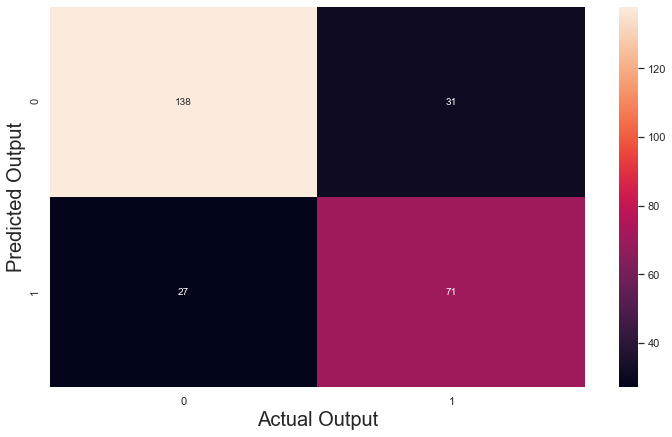

In [170]:
cm= confusion_matrix(y_pred_voting, y_test)
ax=sns.heatmap(cm, annot=True, fmt="0", annot_kws={"size":10})
plt.xlabel('Actual Output', fontsize=20)
plt.ylabel('Predicted Output', fontsize=20)

Text(84.5, 0.5, 'Predicted Output')

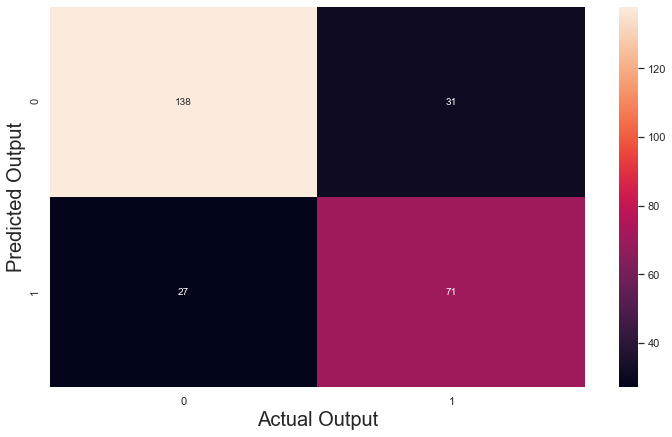

In [85]:
#Let's also visualize our predictions with a confusion matrix
cm= confusion_matrix(y_pred, y_test)
ax=sns.heatmap(cm, annot=True, fmt="0", annot_kws={"size":10})
plt.xlabel('Actual Output', fontsize=20)
plt.ylabel('Predicted Output', fontsize=20)
#We can see that it has 20 false negatives and 14 false positives

In [89]:
sklearn_model = LogisticRegression(class_weight = 'balanced', random_state = 42)
clf_sklearn = sklearn_model.fit(X_train, y_train)

In [90]:
def plot_roc_curve(fpr, tpr,label = None):
    plt.plot(fpr,tpr,linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'k--')
    

In [91]:
y_scores = cross_val_predict(clf_sklearn,X_train, y_train, cv = 3, method = 'decision_function')

In [92]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [93]:
#it's time to explore coefficients. Since this is a logistic model,we cannot directly interpret them. 
#We will convert them to odds ratios.

model_odds = pd.DataFrame(np.exp(result2.params), columns= ['OR'])
model_odds['p-value']= result2.pvalues

model_odds

#Based on these odds ratios, we can conclude, that all other features equal, compared to the base classes:
#1. a child is 3 times more likely to survive than "not a child".
#2. A man is ~ 92% less likely to survive than a woman.
#3. Passengers in first class are much better off than in other classes: the lower the class, the slimmer 
#are chances of survival.

,OR,p-value
const,1.000000,NaN
x1,0.818415,NaN
x2,0.469624,NaN
x3,1.356257,NaN
x4,0.275267,NaN


In [94]:
#in order to understand which variables affect the chances of survival the most, 
#we will calculate their respective marginal effects:

print(result2.get_margeff().summary()) 

#As we can see men are still worse off, closely followed by third-class passengers.

ValueError: need covariance of parameters for computing (unnormalized) covariances

In [96]:
#same with RandomForestClassifier:

forest_clf = RandomForestClassifier (random_state = 42,class_weight = 'balanced_subsample')
forest_clf.fit(X_train,y_train)
forest_clf.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0])

In [100]:
y_probas_forest = cross_val_predict(forest_clf,X_train, y_train, cv = 3, method = "predict_proba")

In [101]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest,thresholds_forest = roc_curve(y_train, y_scores_forest)

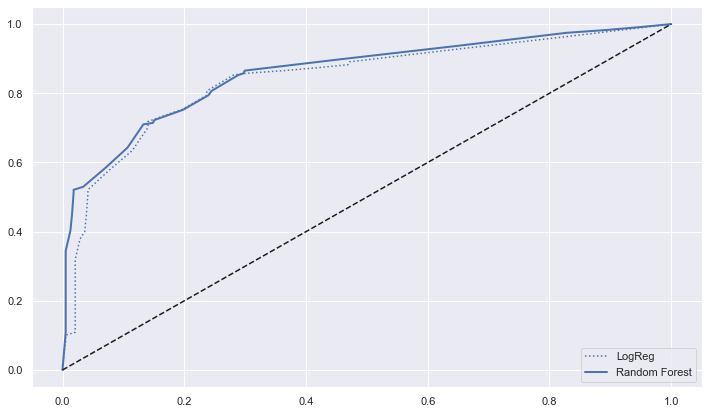

In [102]:
plt.plot(fpr,tpr,"b:", label = "LogReg")
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc = 'lower right');

Text(84.5, 0.5, 'Predicted Output')

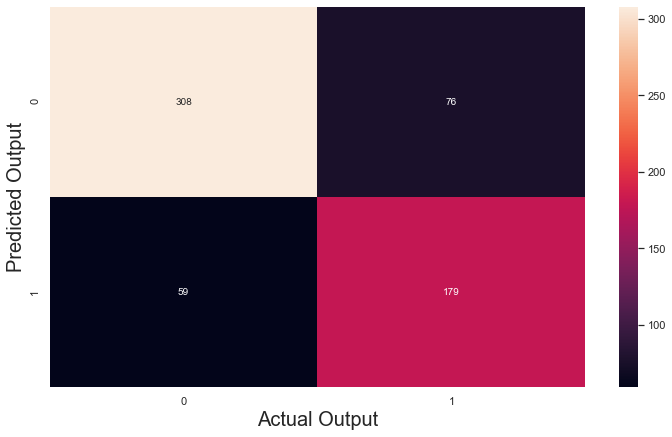

In [104]:
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv = 3)
cm= confusion_matrix(y_train, y_pred_forest)
ax=sns.heatmap(cm, annot=True, fmt="0", annot_kws={"size":10})
plt.xlabel('Actual Output', fontsize=20)
plt.ylabel('Predicted Output', fontsize=20)

In [105]:
print(roc_auc_score(y_train, y_scores),roc_auc_score(y_train, y_scores_forest))

0.8434709821428572 0.8595774247198879


### Conclusion ###

Based on our analysis, both the visualizations, and logistic regression confirm that several categories of passengers were most likely to survive the Titanic disaster, namely women, children and first class passengers. The presense or absense of family on board, as well as the size of the family, did not significantly affect the odds of survival. Same goes for Embarcation port.